In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [64]:
#!pip install factor_analyzer  
from factor_analyzer import FactorAnalyzer, calculate_bartlett_sphericity, calculate_kmo

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#%cd drive/MyDrive/Github/master_thesis
%cd drive/MyDrive/GitHub/master-thesis
from clustering.utils import *

/content/drive/MyDrive/GitHub/master-thesis


In [25]:
def cronbach_alpha(df):
    # 1. Transform the df into a correlation matrix
    df_corr = df.corr()
    
    # 2.1 Calculate N
    # The number of variables equals the number of columns in the df
    N = df.shape[1]
    
    # 2.2 Calculate R
    # For this, we'll loop through the columns and append every
    # relevant correlation to an array calles "r_s". Then, we'll
    # calculate the mean of "r_s"
    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
    mean_r = np.mean(rs)
    
   # 3. Use the formula to calculate Cronbach's Alpha 
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha

# Preprocessing

In [5]:
beh_cols = get_behaviour_cols()
df_fa_input = get_preprocessed_data(impute=True, impute_cols=beh_cols)

In [7]:
scaler = MinMaxScaler()
fa_input = scaler.fit_transform(df_fa_input[beh_cols].to_numpy())
fa_input.shape

(123230, 23)

# Voraussetzungen prüfen
ref: Applied Statistics and Multivariate Data Analysis for Business and Economics or more specific: Backhaus et al. (2016, p. 395)

1. "Most of the correlation coefficients of the matrix must exhibit significant values."

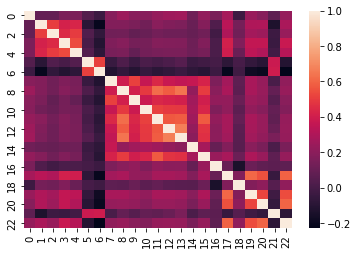

In [60]:
corr_matrix = pd.DataFrame(fa_input).corr()
sns.heatmap(corr_matrix)

2. "The inverse of the correlation matrix must display a diagonal matrix with as many
values close to zero for the non-diagonal elements as possible."


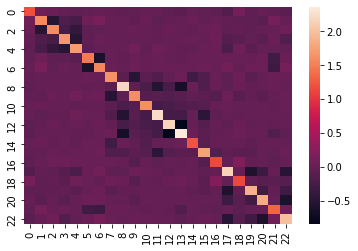

In [62]:
inv_corr_matrix = np.linalg.inv(corr_matrix.to_numpy())
sns.heatmap(inv_corr_matrix)

3. "The Bartlett test (sphericity test) verifies whether the variables correlate. It
assumes a normal distribution of item values and a χ2 distribution of the test
statistics. It checks the randomness of correlation matrix deviations from an
identity matrix. A clear disadvantage with this test is that it requires a normal
distribution. For any other form of distribution, the Bartlett test should not be used."

In [65]:
# P Value should be smaller 0.05
statistic, p_value = calculate_bartlett_sphericity(fa_input)
print(statistic, p_value)

(981762.0282125559, 0.0)

4. "A factor analysis should not be performed when, in an anti-image covariance
matrix (AIC),1 more than 25% of elements below the diagonal have values larger
than 0.09."


5. "The Kaiser-Meyer-Olkin measure (or KMO measure) is generally considered by
researchers to be the best method for testing the suitability of the correlation
matrix for factor analysis, and it is recommended that it be performed before
every factor analysis. It expresses a measure of sample adequacy (MSA) between
zero and one. Calculated by all standard statistics software packages, MSA works
for the sampling adequacy test for the entire correlation matrix as well as for each
individual item. The KMO/MSA should be bigger or equal to 0.5. Table 13.1
suggests how KMO might be interpreted."

In [68]:
#KMO should be greater or equal to 0.5
kmo_per_item, kmo_total = calculate_kmo(fa_input)

/usr/local/lib/python3.7/dist-packages/factor_analyzer/utils.py:249: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


In [70]:
(kmo_per_item < 0.5).sum() + (kmo_total < 0.5).sum()

0

# Factor Analysis

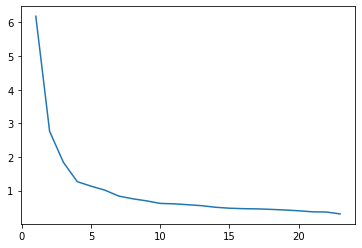

In [21]:
fa = FactorAnalyzer()
fa.fit(fa_input)
#Get Eigen values and plot them
ev, v = fa.get_eigenvalues()
plt.plot(range(1,fa_input.shape[1]+1),ev)

In [22]:
ev

array([6.18537892, 2.75966669, 1.83710469, 1.26318335, 1.1296726 ,
       1.01065294, 0.83451606, 0.75525242, 0.69358927, 0.6166917 ,
       0.60473439, 0.578059  , 0.54900538, 0.5021479 , 0.47446052,
       0.46021414, 0.45439777, 0.43957787, 0.42152732, 0.3978023 ,
       0.36683559, 0.36101655, 0.30451264])

In [16]:
num_factors_one = (ev > 1).sum()
num_factors_avg = (ev > ev.mean()).sum()
print(f'Es gibt {num_factors_one} Eigenwerte, die größer als eins sind und {num_factors_avg} Eigenwerte, die größer als der Durchschnitt sind.')

Es gibt 6 Eigenwerte, die größer als eins sind und 6 Eigenwerte, die größer als der Durchschnitt sind.


In [49]:
fa = FactorAnalyzer(6, rotation='varimax')
fa.fit(fa_input)
loads = fa.loadings_
print(loads)

[[ 0.25399987  0.27107487  0.07423186  0.06765862  0.08550558 -0.18005029]
 [ 0.12709104  0.15950226  0.61300231 -0.1743351   0.07285509  0.07289252]
 [ 0.05449842  0.11175054  0.70821989  0.00761241  0.04790008  0.05213122]
 [ 0.10269473  0.31438779  0.59485713 -0.00745477  0.04737953  0.06533038]
 [ 0.06784774  0.25996134  0.67678697  0.03741999  0.0366178  -0.02677652]
 [ 0.00727109 -0.05028805  0.0505477   0.70093361 -0.03011534 -0.01639949]
 [-0.07257556 -0.15343294 -0.07427249  0.71661949 -0.0430234   0.00592644]
 [ 0.38423446  0.13334294  0.09094749 -0.04638657  0.63960977 -0.01752144]
 [ 0.75219892  0.14383907  0.09844309  0.02395019  0.10524449 -0.01532225]
 [ 0.46372531  0.12887694  0.03416513 -0.03616199  0.44842999  0.01838365]
 [ 0.59375203  0.08554821  0.07160666  0.02797456  0.22718845  0.0084253 ]
 [ 0.72906204  0.11986988  0.09897743 -0.01150774  0.22471435  0.01488174]
 [ 0.74985563  0.15056236  0.08493034  0.0274945   0.08615235 -0.02445466]
 [ 0.80164416  0.14002225

# Evaluate Factors

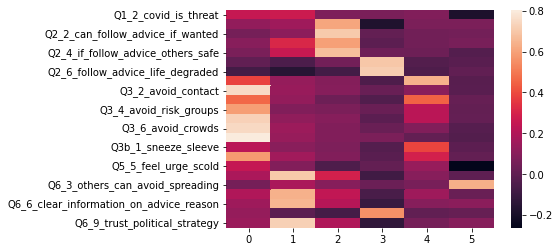

In [50]:
heatmap_data = pd.DataFrame(loads.T, columns=beh_cols).T
sns.heatmap(heatmap_data)

In [52]:
dict_fa = {}
for i in np.arange(6):
  col_names = heatmap_data[heatmap_data[i] > 0.4][i].index.tolist()
  df_factor = df_fa_input[col_names]
  factor_alpha = cronbach_alpha(df_factor)
  temp_dict = {'Factor_Names': col_names, 'Data': df_factor, 'Cronbach_Alpha': factor_alpha}
  print(f'Factor {i} with Columns {col_names} has a Cronbachs Alpha of {factor_alpha}')
  dict_fa.update({i: temp_dict})

Factor 0 with Columns ['Q3_2_avoid_contact', 'Q3_3_ensure_frequent_cleaning', 'Q3_4_avoid_risk_groups', 'Q3_5_keep_distance', 'Q3_6_avoid_crowds', 'Q3_7_minimize_activities_w_contact', 'Q5_4_yourself_kept_distance'] has a Cronbachs Alpha of 0.8764152535977179
Factor 1 with Columns ['Q6_2_advices_important', 'Q6_5_ownership_of_advice', 'Q6_6_clear_information_on_advice_reason', 'Q6_9_trust_political_strategy'] has a Cronbachs Alpha of 0.8414135627489101
Factor 2 with Columns ['Q2_1_easy_to_follow_advice', 'Q2_2_can_follow_advice_if_wanted', 'Q2_3_if_follow_advice_safe', 'Q2_4_if_follow_advice_others_safe'] has a Cronbachs Alpha of 0.7817912950437301
Factor 3 with Columns ['Q2_5_follow_advice_relationships_impared', 'Q2_6_follow_advice_life_degraded', 'Q6_7_advice_limits_daily_activities'] has a Cronbachs Alpha of 0.6948149350172989
Factor 4 with Columns ['Q3_1_aware_hand_hygiene', 'Q3_3_ensure_frequent_cleaning'] has a Cronbachs Alpha of 0.6787236071179091
Factor 5 with Columns ['Q6_3_o

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# Create new factors

In [53]:
# latent_variable_names
new_variables = fa.transform(fa_input)
df_fa = pd.DataFrame(new_variables) # , columns=latent_variable_names
df_fa

,0,1,2,3,4,5
0,0.702708,0.736905,0.013848,0.595045,-0.506852,0.279142
1,0.891147,0.384225,0.472550,0.425550,0.341770,0.199452
2,0.519201,0.418916,0.691699,-0.416516,0.270534,-0.252001
3,0.915876,1.090491,-0.949254,-0.758631,0.150297,-0.038190
4,0.266998,0.412288,-2.031489,0.439282,0.922818,-0.349530
...,...,...,...,...,...,...
123225,0.709401,0.099010,-2.269721,0.180023,-0.144645,-0.039513
123226,0.407530,0.093222,0.684857,-0.654468,0.298144,-0.616601
123227,-0.811464,-0.190944,-0.183903,-0.072865,-1.000185,0.242839
123228,-0.202467,0.346022,-2.183940,-0.525703,0.286843,0.850911


In [46]:
df_fa.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123230 entries, 0 to 123229
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       123230 non-null  float64
 1   1       123230 non-null  float64
 2   2       123230 non-null  float64
 3   3       123230 non-null  float64
dtypes: float64(4)
memory usage: 4.7 MB


# Plot Factors

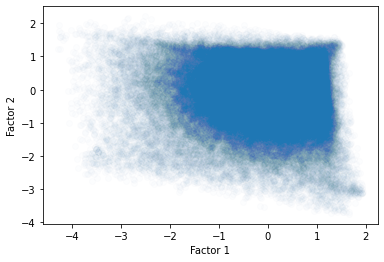

In [47]:
plt.scatter(x=df_fa[0], y=df_fa[1], alpha=0.01)
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.show()

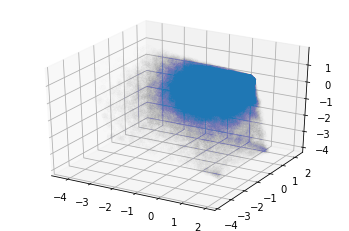

In [48]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df_fa[0], df_fa[1], df_fa[2], alpha=0.005)

# Write Data

In [ ]:
df_fa_write = pd.concat([df_fa, df_fa_input], axis=1)
df_fa_write.dropna(subset=latent_variable_names, inplace=True)
df_fa_write.info()

In [ ]:
df_fa_write.to_csv('data/preprocessing/dim_reduction/220422_fa_data.csv', index=False)